In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def P(p, x):
    a,x0=p
    return np.exp(a*(x-x0))/(1+np.exp(a*(x-x0)))

def loss(p, A, B):
    loss = np.sum([P(p,a)**2 for a in A])
    loss += np.sum([(P(p,b)-1)**2 for b in B])
    return loss

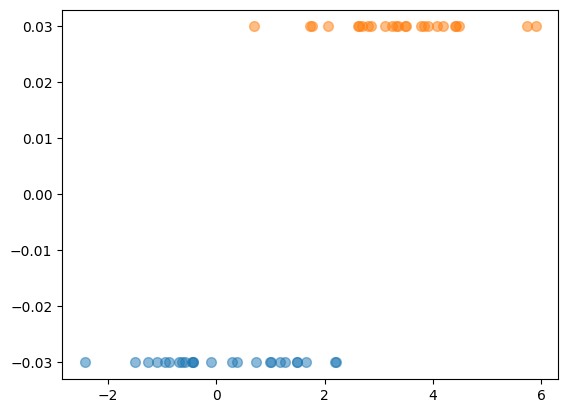

In [4]:
np.random.seed(123)
Npoints = 25
t = np.zeros(Npoints)
A = np.random.normal(loc=0.0, scale=1.0, size=Npoints)
B = np.random.normal(loc=3.5, scale=1.0, size=Npoints)
fig,ax = plt.subplots()
ax.plot(A, t-0.03, 'o', alpha=0.5, markersize=7)
ax.plot(B, t+0.03, 'o', alpha=0.5, markersize=7)

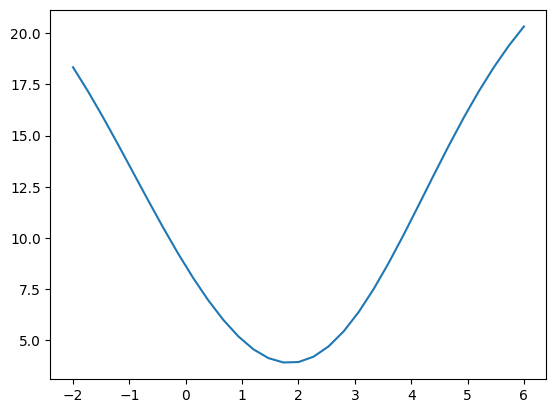

In [7]:
xrange = np.linspace(-2,6,31)
plt.plot(xrange, [loss((1,x),A,B) for x in xrange])

In [8]:
p0 = [1, 1]  # initial guess
params = (A,B)  # values of a, b

res = minimize(loss, p0, args=params)
print(res)
print("Minimum at:", res.x, "Function value:", res.fun)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.084323960317745
        x: [ 2.490e+00  1.940e+00]
      nit: 10
      jac: [-2.503e-06  6.407e-06]
 hess_inv: [[ 3.640e+00  5.395e-02]
            [ 5.395e-02  1.593e-01]]
     nfev: 33
     njev: 11
Minimum at: [2.48972617 1.94026903] Function value: 3.084323960317745


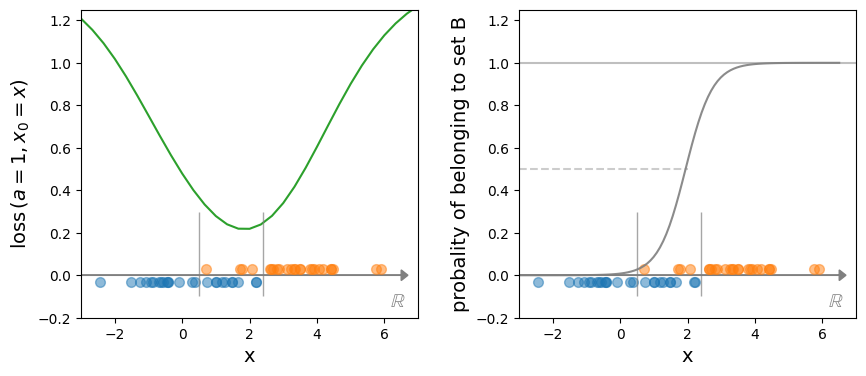

In [32]:

fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(x, t-0.03, 'o', alpha=0.5, markersize=7)
ax[0].plot(y, t+0.03, 'o', alpha=0.5, markersize=7)
xrange = np.linspace(-3,7,31)
ax[0].plot(xrange, [loss((1,x),A,B)/18 for x in xrange])
ax[0].arrow(-3,0,   # starting point (x,y)
         9.5, 0,   # direction vector (dx, dy)
         head_width=0.05, head_length=0.2,
         fc='gray', ec='gray')
ax[0].set_ylim(-0.2,1.25)
ax[0].set_xlim(-3,7)
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('loss'+r'$\,(a=1, x_0=x)$', fontsize=14)
ax[0].text(6.4, -0.15, r'$\mathbb{R}$', color='gray', fontsize=14, ha='center')
ax[0].vlines(x=0.5, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax[0].vlines(x=2.4, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)

######################################
ax[1].plot(x, t-0.03, 'o', alpha=0.5, markersize=7)
ax[1].plot(y, t+0.03, 'o', alpha=0.5, markersize=7)

s = np.linspace(-3,6.5,101)
w=3
ax[1].plot(s, [P(res.x, sx) for sx in s], color='tab:grey', alpha=0.9)

ax[1].axhline(1, ls='-', color='gray', alpha=0.5)
s1 = np.linspace(-3,2,5)
v1 = np.zeros_like(s1)
ax[1].plot(s1,0.5+v1, '--', color='gray', alpha=0.4)
ax[1].set_ylim(-0.2,1.25)
ax[1].set_xlim(-3,7)
#ax[1].axis("off")
ax[1].arrow(-3,0,   # starting point (x,y)
         9.5, 0,   # direction vector (dx, dy)
         head_width=0.05, head_length=0.2,
         fc='gray', ec='gray')
ax[1].text(6.4, -0.15, r'$\mathbb{R}$', color='gray', fontsize=14, ha='center')
ax[1].vlines(x=0.5, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax[1].vlines(x=2.4, ymin=-0.1, ymax=0.3, color="grey", linewidth=1, alpha=0.7)
ax[1].set_xlabel("x", fontsize=14)
ax[1].set_ylabel("probality of belonging to set B", fontsize=14)
##########################################

fig.subplots_adjust(wspace=0.3, hspace=0.4)
fig.savefig('Pics/probabilistic_classification.pdf')
plt.show()
